In [75]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#get data copied from Jen's Github (up to 10/2019)
df = pd.read_csv("Groundwater_Manual_WaterLevel.csv")

In [3]:
#change 'Time' from OBJECT to DATETIME type
df['Time'] = pd.to_datetime(df['Time'])

In [31]:
#based on WATER HEIGHT RELATIVE TO GROUND (incomplete data)

#make dictionary of dataframes -- use unique well names
dfs = dict(tuple(df.groupby("Well Name")))

#call ex. --> dfs['some well name']
#output ex. --> dataframe of subsect of original data with given 'some well name'

In [45]:
#new dictionary based on unique well names -- holds average measurement per day
avgd = dict.fromkeys(df['Well Name'].unique())

In [101]:
#average 3 measurements for each day -- from dfs into avgd
for x in dfs:
    avgd[x] = dfs[x].groupby("Time")["Water Height Relative To Ground(cm)"].mean().reset_index()
    avgd[x].columns = ['Time','Avg']

#call ex. --> avgd['some well name']
#output ex. --> df for 'some well name' time + average measurement + month

In [149]:
#add month + year columns
for x in avgd:
    avgd[x]['Year'] = avgd[x]['Time'].dt.year
    avgd[x]['Month'] = avgd[x]['Time'].dt.month
    avgd[x]['Day'] = avgd[x]['Time'].dt.dayofyear

In [151]:
avgd.keys()   #to see well names

dict_keys(['EEF-1', 'EER-1', 'EET-1', 'EET-2', 'EFF-XA1N', 'EFF-XA2N', 'EFF-XB7S', 'EFR-XB1S', 'EFR-XB2N', 'EFR-XB2S', 'EFR-XB3N', 'EFR-XB3S', 'EHF-XA3S', 'EHR-1', 'EHR-XB1N', 'EHT-XA5S', 'EHT-XB4S', 'EHT-XB5S', 'EHT-XC6S', 'EWF-XA2S', 'EWR-1', 'EWR-XB4N', 'EWT-1', 'KEF-1', 'KER-1', 'KER-XD5N', 'KER-XE3S', 'KET-1', 'KFF-XD6S', 'KFF-XE8S', 'KFR-XE1S', 'KFR-XE2S', 'KHF-1', 'KHF-XD4S', 'KHF-XE7S', 'KHR-1', 'KHR-XD1N', 'KHR-XD2N', 'KHR-XE2N', 'KHT-XD3S', 'KHT-XD6N', 'KHT-XE4S', 'KHT-XE5S', 'KHT-XE6S', 'KRH-XD1S', 'KWF-1', 'KWR-1', 'KWR-XD1N', 'KWR-XE1N', 'KWT-1', 'LET-1', 'LHT-1', 'LWT-1'])

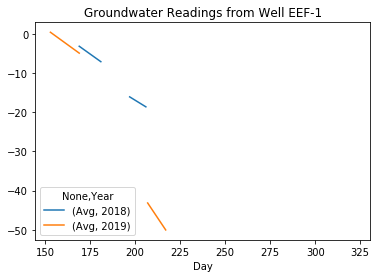

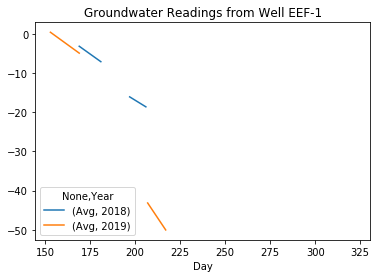

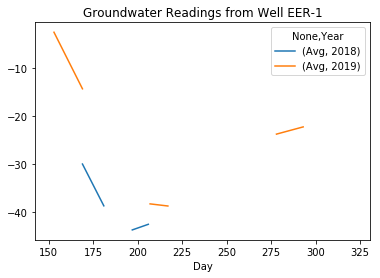

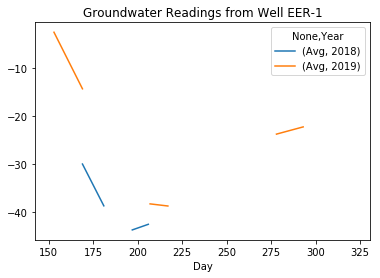

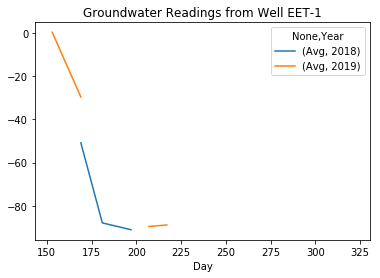

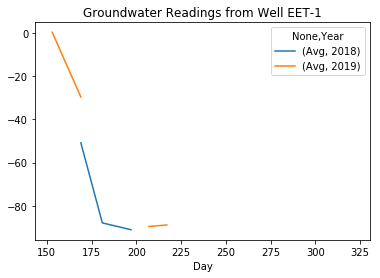

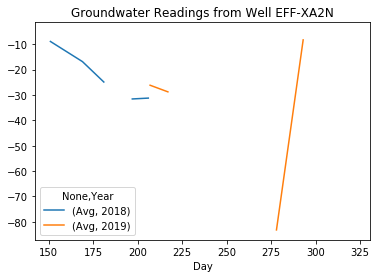

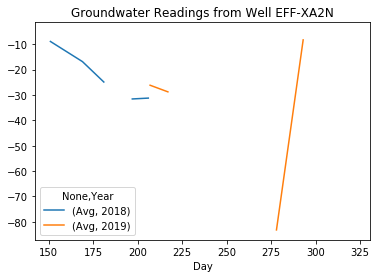

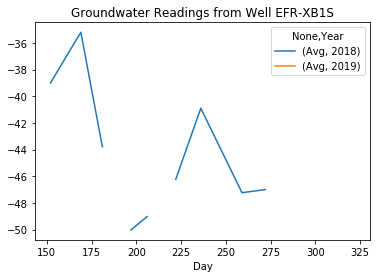

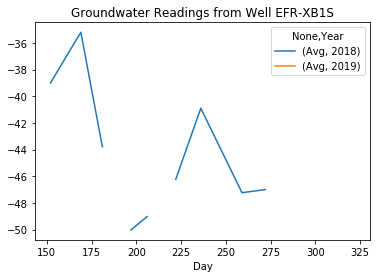

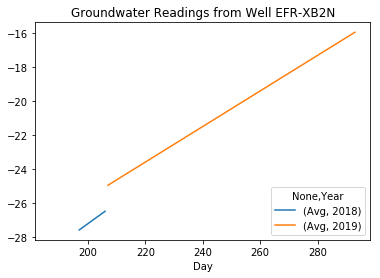

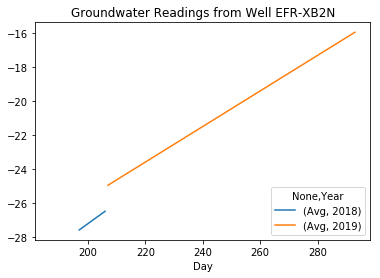

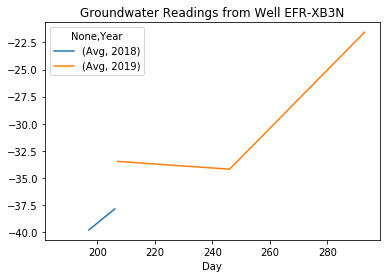

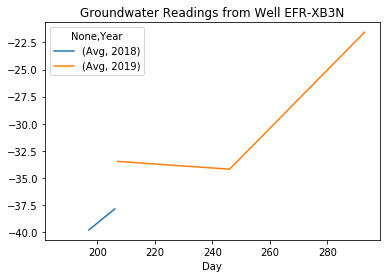

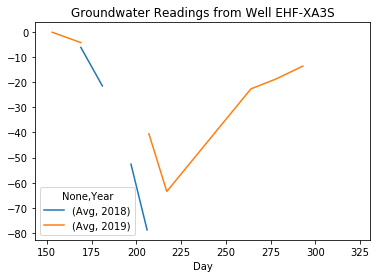

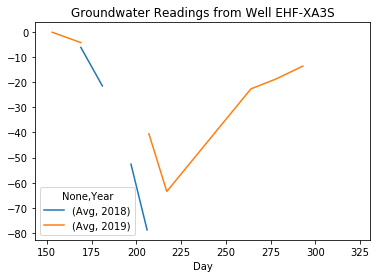

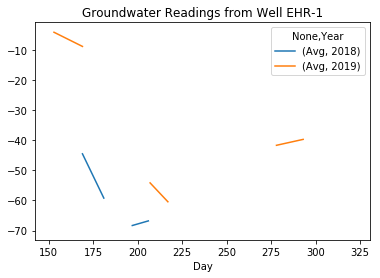

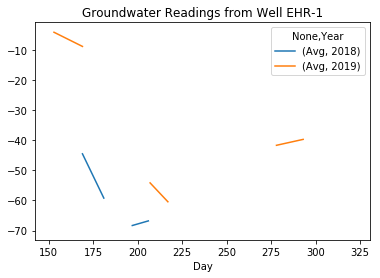

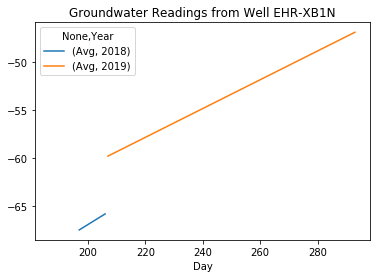

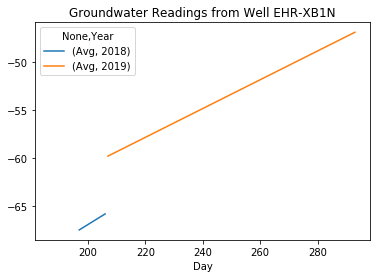

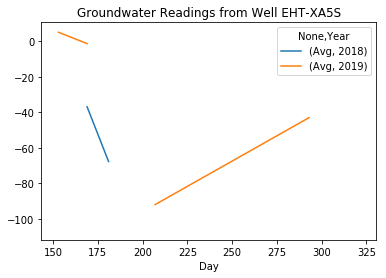

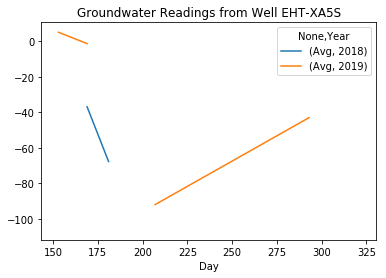

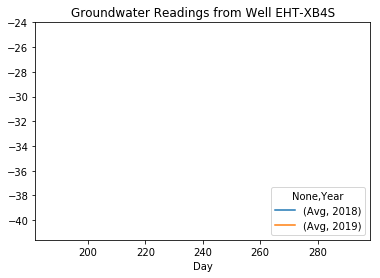

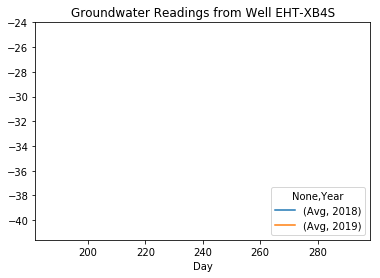

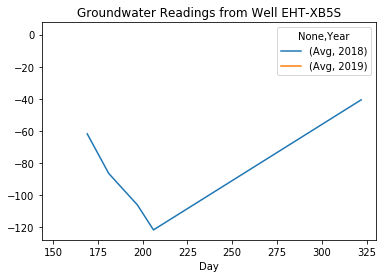

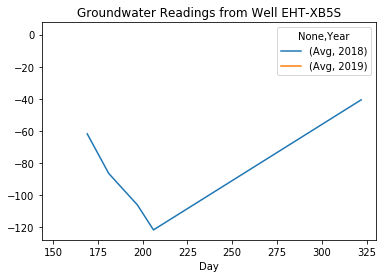

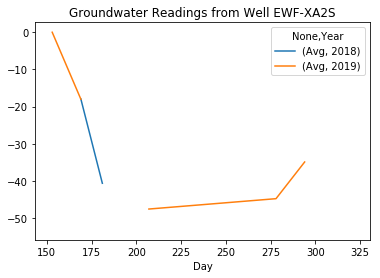

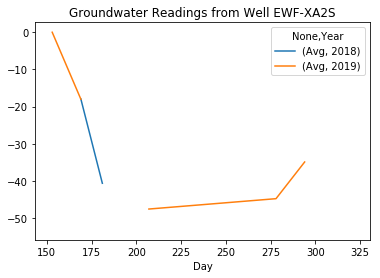

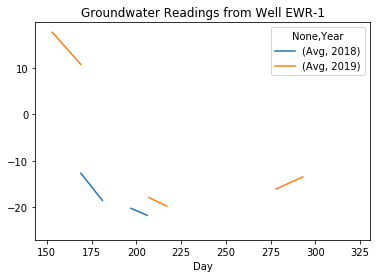

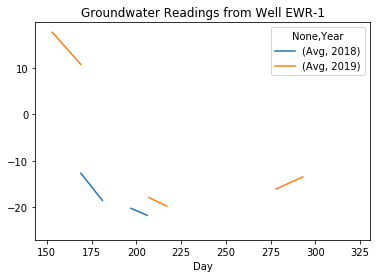

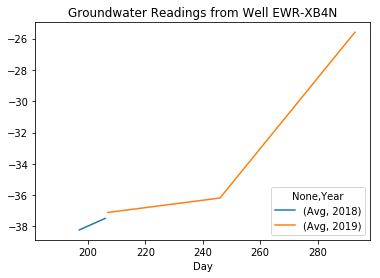

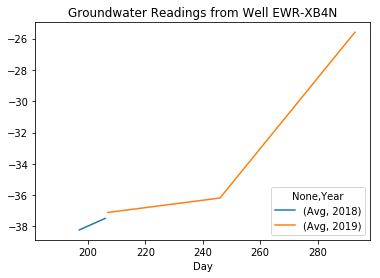

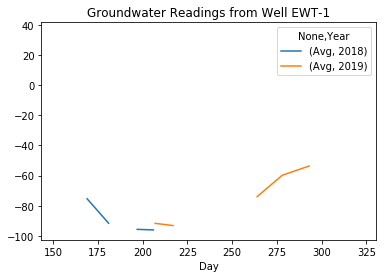

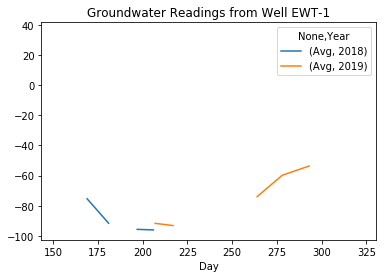

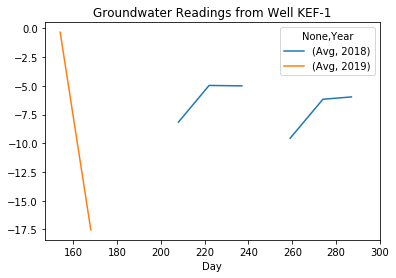

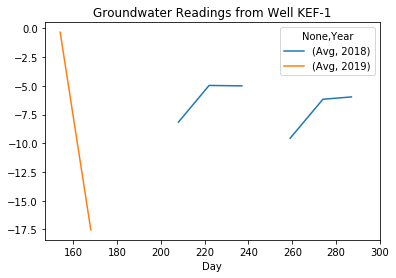

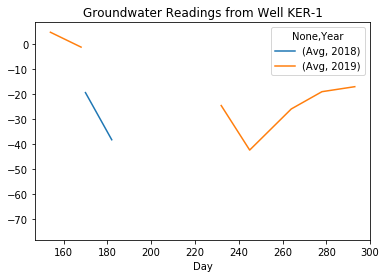

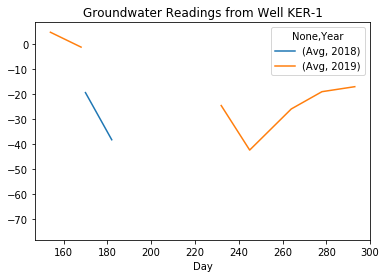

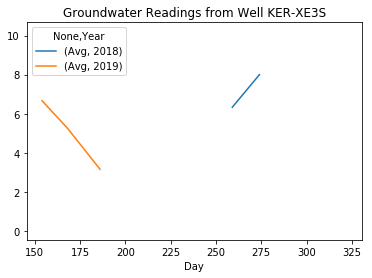

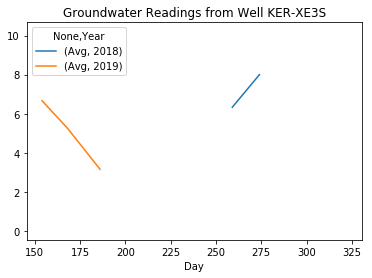

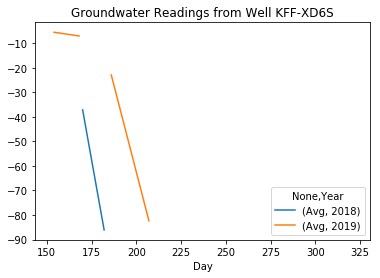

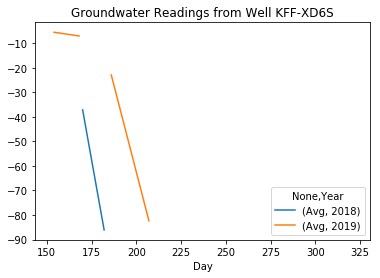

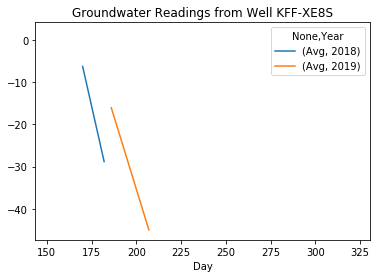

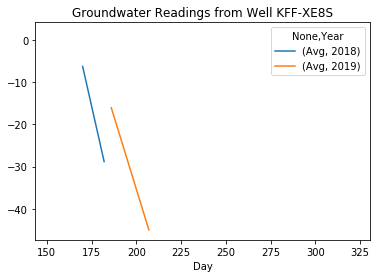

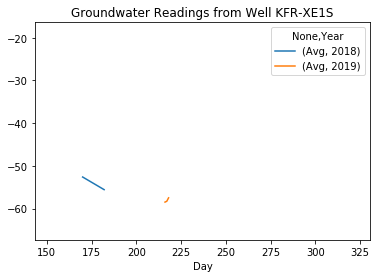

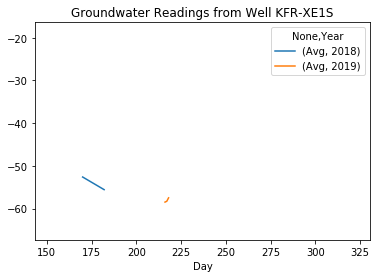

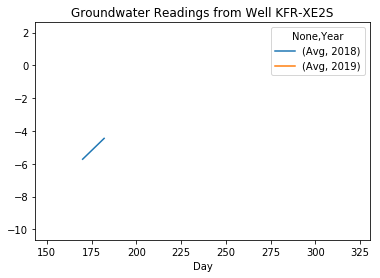

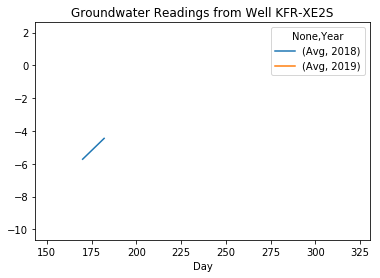

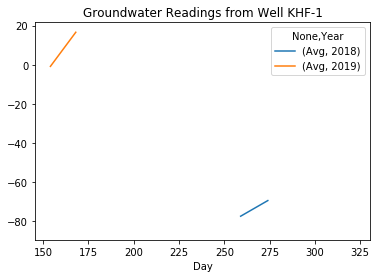

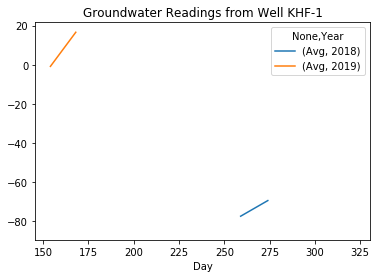

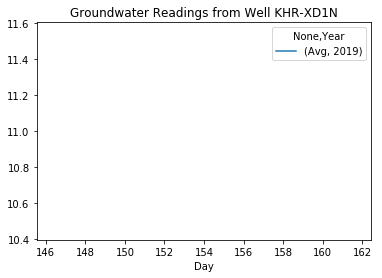

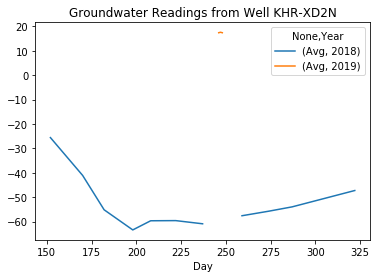

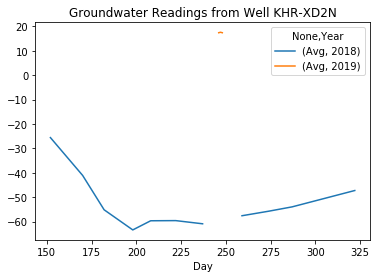

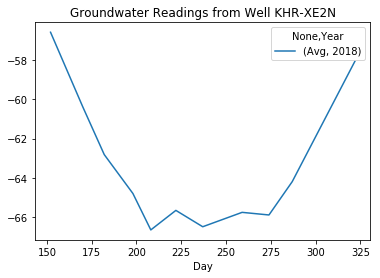

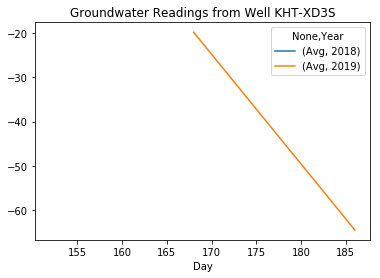

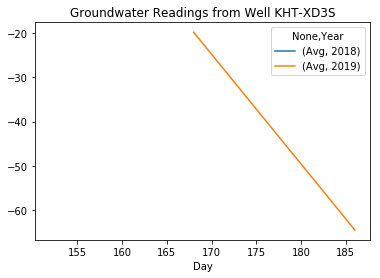

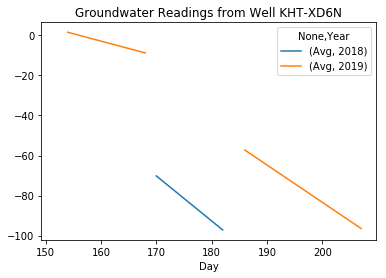

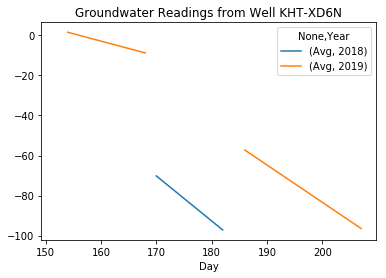

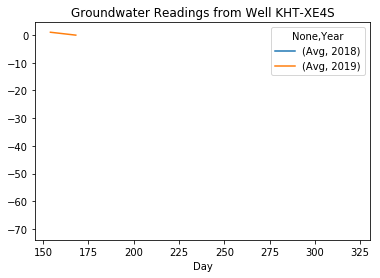

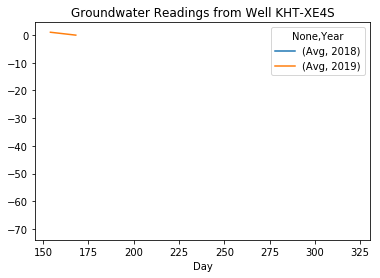

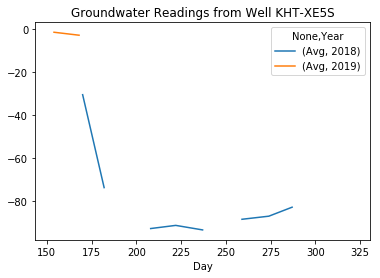

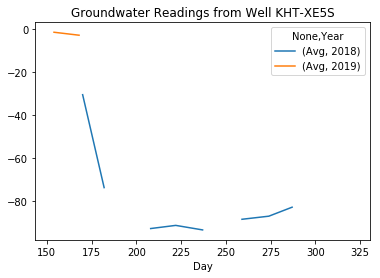

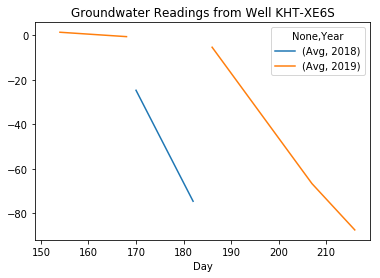

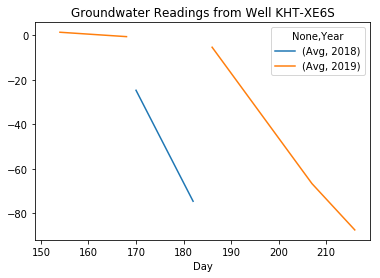

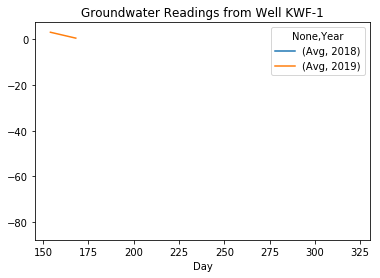

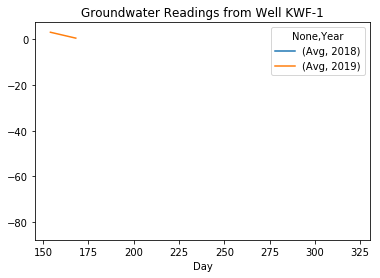

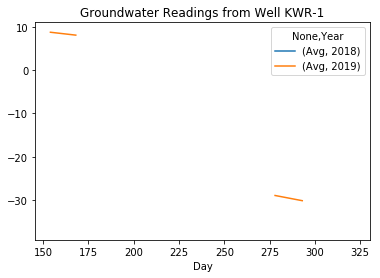

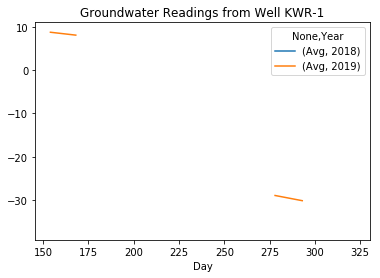

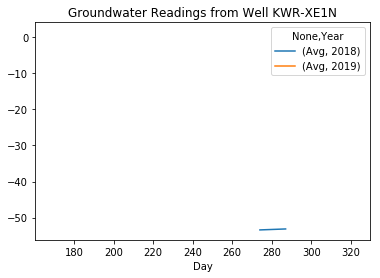

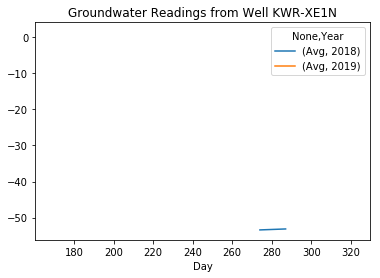

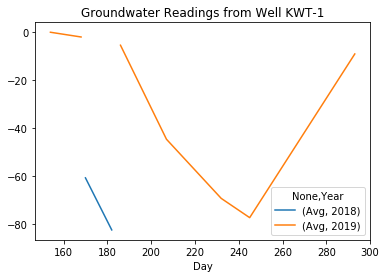

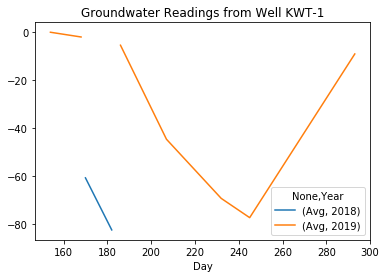

In [152]:
#pivot table for plotting -- switching Year to column headers, Day to index
for x in avgd:
    piv = pd.pivot_table(avgd[x],index=['Day'],columns=['Year'],values=['Avg'])
    for col in piv:
        if piv[col].isnull().all() == True:
            continue
        else: 
            #plot well data by year on same axis
            piv.plot(title='Groundwater Readings from Well '+x)
            plt.show()